# Two different initial boundaries 

This experiment began with two groups differing in their initial learning. The Left group got two initial learning items shifted toward the spiky end of the distribution (30 and 170) while the Right group got two items shifted toward the smoothe end (130 and 270). Both learning items were consistent with a true boundary lying at the range midpoint (150). After initial learning and grid test, the two groups got exactly the same feedback from two sources. Source 1 had lying at the midpoint between the labeled examples seen by the Left group (100), while Source 2 used a boundary lying at the midpoint between the labeled examples seen by the Right group (200). After 300 trials of learning, a second grid test assessed the implicit boundary shift, after which the sources were rated for knowledge, percent correct, trust, and attractivenes.

Both groups got overwhelmingly similar learning experiences, all consistent with a midline boundary. The question was whether they would consequently end up with more similar boundaries, or whether the existence of a single source consistent with their starting belief would be enough to negate any boundary shift.

All data, raw and processed, are stored in the Excel file DiffInitialBounds.xlsx. Cleaned raw data for the grid test are also
stored in the text file item_grid.txt. Cleaned raw data for the face ratings are stored in Face_Items.txt.

item_grid.txt can be read into R as a data frame. The function get_pars.r will then extract the grid-test metrics from this
object--slope, intercept, and boundary for each grid test, as well as shift and midline shift measures.

PARAMETERS:

Subjects in the LEFT condition had labeled examples at 30 and 170, while those in the RIGHT condition had labeled examples at 130 and 270. Each subject saw 10 repetitions of each labeled items, with feedback, presented in a different permuted order for each subject.

Grid tests to measure the implicit boundary ranged from 60 to 240 at intervals of 10. Each grid point was tested twice, and order was permuted independently for each subject.

In the multi-source part of the study, source boundaries were at 100 and 200 for all participants.



## Packages

In [3]:
library(reshape) #Reshaping functions melt and cast
library(lme4)

Warning message:
"package 'reshape' was built under R version 3.6.3"Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:reshape':

    expand



## Useful functions and parameters

In [2]:
get.pars <- dget("get_pars.r") #Function to compute grid parameters from raw data
plot.bars <- dget("plot_bars.r")  #Function for barplots with error bars
zscore <-function(v){(v-mean(v, na.rm=T))/(sqrt(var(v, na.rm=T)))}

zthresh <- 2.0

## Grid Data

### First get the grid parameter estimates

In [3]:
tmp <- read.table("item_grid.txt", header = T) #Read item grid data for all subjects into tmp object
allpars <- get.pars(tmp)  #Compute parameters of logistic fit
rm(tmp) #remove tmp objects

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fi

Warnings occur when boundary is perfect, can safely ignore

In [4]:
dim(allpars)
head(allpars)


[1] 35 12

sno,axlab,group,t1int,t1slope,t1bound,t2int,t2slope,t2bound,bshift,midshift,Zmidshift
1,C,L,29.353515,-0.18937752,155.0000,246.761529,-2.056346072,120.0000,-35.00000,-35.00000,-0.6636461
2,C,R,13.489814,-0.07933752,170.0307,758.493767,-4.100055216,184.9960,14.96530,-14.96530,-0.2084598
3,R,L,-6.164781,0.04109854,150.0000,-351.382156,2.066953858,170.0000,20.00000,20.00000,0.5859479
4,R,R,14.194606,-0.08871362,160.0048,-0.745252,0.004256433,175.0884,15.08357,-15.08357,-0.2111470
5,C,L,18.482418,-0.12321612,150.0000,9.817757,-0.054386821,180.5172,30.51720,30.51720,0.8248974
6,C,R,351.382156,-2.06695386,170.0000,794.671773,-4.075346828,194.9949,24.99488,-24.99488,-0.4363309


Check for impossible t1 and t2 boundaries

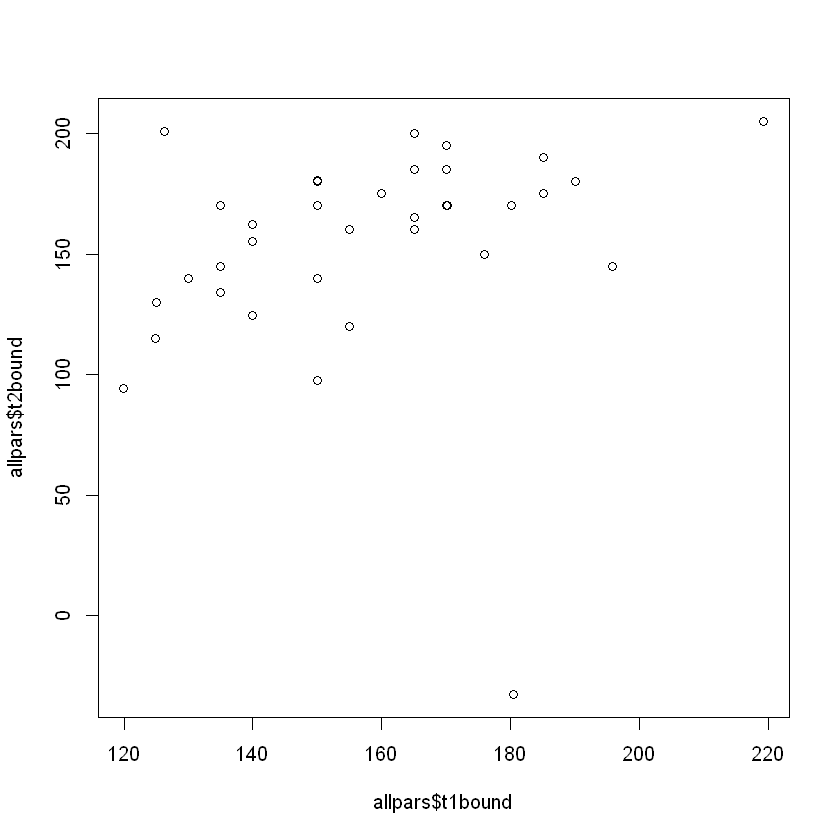

In [5]:
plot(allpars$t1bound, allpars$t2bound)

Remove subjects with impossible boundaries

In [6]:
sjex <- as.character(allpars$sno[allpars$t2bound < 0]) #Add subject number to exclude list
noo <- allpars[is.na(match(allpars$sno, sjex)),]  #Copy remaining subjects to noo object
dim(noo) #Check that only one has been removed

[1] 34 12

Now check for outliers in t1bounds for each group

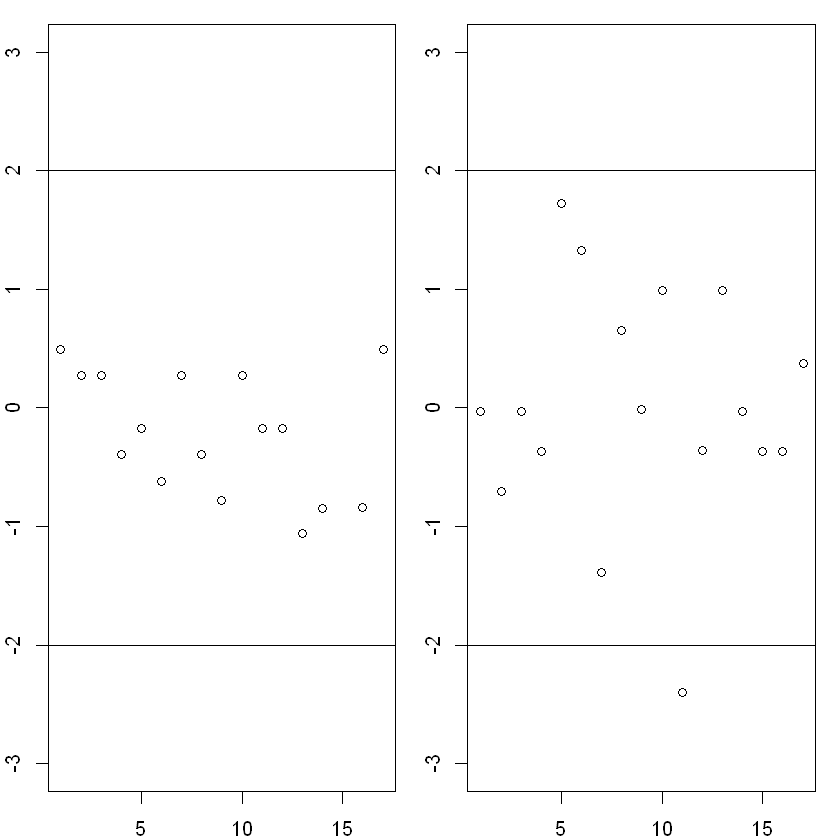

In [7]:
par(mfrow = c(1,2), mar = c(2,2,1,1))
plot(zscore(noo$t1bound[noo$group=="L"]), ylim = c(-3,3)); abline(h=c(-zthresh,zthresh))
plot(zscore(noo$t1bound[noo$group=="R"]), ylim = c(-3,3)); abline(h=c(-zthresh, zthresh))

Remove any outliers.

In [8]:
tmp <- rep(0, times = dim(noo)[1]) #create a placeholder for zscores
tmp[noo$group=="L"] <- abs(zscore(noo$t1bound[noo$group=="L"]))  #put zscores for t1bound group L in
tmp[noo$group=="R"] <- abs(zscore(noo$t1bound[noo$group=="R"]))  #put zscores for t1bound group R in

sjex <- c(sjex, as.character(noo$sno[tmp > zthresh])) #Add outlier to exclude list
sjex <- unique(sjex)  #remove accidental duplicates
noo <- allpars[is.na(match(allpars$sno, sjex)),]  #Copy remaining subjects to noo object
dim(noo) #Check that only one has been removed

[1] 32 12

Now see if any boundary shifts are outliers

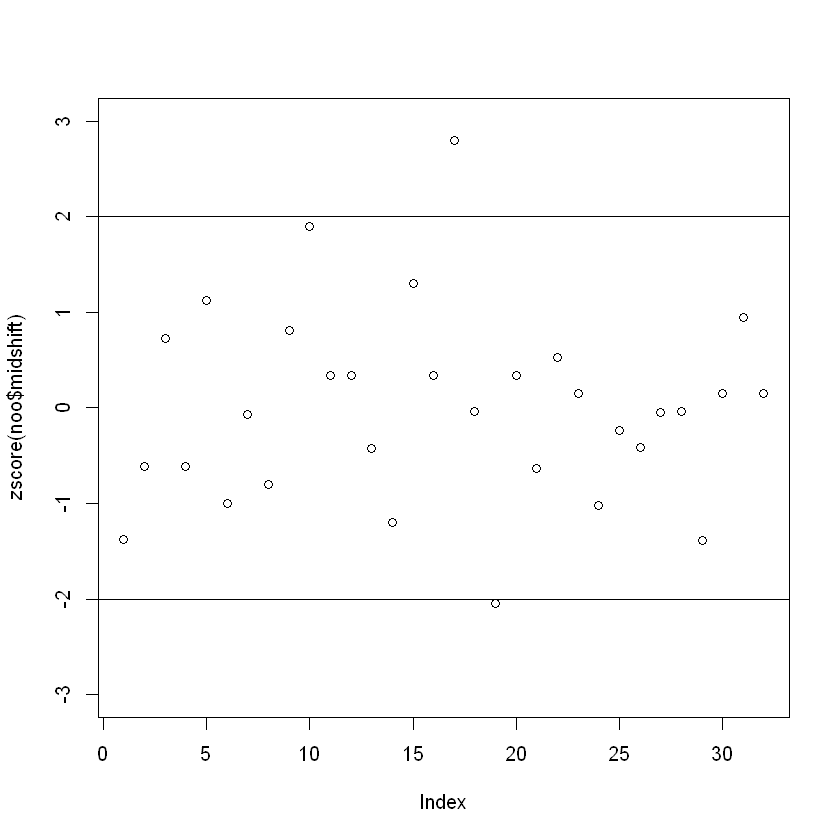

In [9]:
plot(zscore(noo$midshift), ylim = c(-3,3)); abline(h=c(-zthresh, zthresh))

Remove any outliers.

In [10]:
sjex <- c(sjex, as.character(noo$sno[abs(zscore(noo$midshift)) > zthresh]))  #Add subject to exclude list
sjex <- unique(sjex)  #Remove any accidental duplicates
noo <- allpars[is.na(match(allpars$sno, sjex)),]  #Copy remaining subjects to noo object
dim(noo) #Check that only one has been removed

[1] 30 12

## Analysis

### Grid data

Do the initial boundaries differ between the groups?

In [11]:
t.test(t1bound ~ group, data = noo)


	Welch Two Sample t-test

data:  t1bound by group
t = -7.7524, df = 27.673, p-value = 2.072e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -42.1922 -24.5481
sample estimates:
mean in group L mean in group R 
       139.2691        172.6392 


Yes they do.

Does the mean aligned shift differ from zero?

In [12]:
t.test(noo$midshift)


	One Sample t-test

data:  noo$midshift
t = 0.11129, df = 29, p-value = 0.9122
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -7.471844  8.331770
sample estimates:
mean of x 
0.4299632 


No it doesn't--in contrast to other conditions, boundary doesn't shift for either group. Does this mean that the two groups still have different beliefs after learning with the two different sources?

In [13]:
t.test(t2bound ~ group, data = noo)


	Welch Two Sample t-test

data:  t2bound by group
t = -4.2207, df = 20.945, p-value = 0.0003852
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -47.99391 -16.30659
sample estimates:
mean in group L mean in group R 
       142.5788        174.7290 


Yes--even after 300 learning trials receiving the same feedback, all consistent with a boundary at around 150, the two groups retain different beliefs about the location of the category boundary.

Now let's compute the mean and confidence limits for the midline shift, separately for each group.

In [14]:
t.test(noo$midshift[noo$group=="L"])



	One Sample t-test

data:  noo$midshift[noo$group == "L"]
t = 0.59649, df = 13, p-value = 0.5611
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -8.677448 15.296910
sample estimates:
mean of x 
 3.309731 


In [15]:
t.test(noo$midshift[noo$group=="R"])


	One Sample t-test

data:  noo$midshift[noo$group == "R"]
t = -0.38247, df = 15, p-value = 0.7075
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -13.736103   9.556436
sample estimates:
mean of x 
-2.089834 


In both cases the shift is essentially zero--neither group alters their initial category boundary. I won't generate a plot here but will use these data to make the associated figure data.

Finally let's compute the mean and confidence intervals of the initial and final boundaries for each group.

In [16]:
t.test(noo$t1bound[noo$group=="L"])


	One Sample t-test

data:  noo$t1bound[noo$group == "L"]
t = 44.933, df = 13, p-value = 1.194e-15
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 132.5730 145.9651
sample estimates:
mean of x 
 139.2691 


In [17]:
t.test(noo$t1bound[noo$group=="R"])


	One Sample t-test

data:  noo$t1bound[noo$group == "R"]
t = 57.798, df = 15, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 166.2727 179.0058
sample estimates:
mean of x 
 172.6392 


In [18]:
t.test(noo$t2bound[noo$group=="L"])


	One Sample t-test

data:  noo$t2bound[noo$group == "L"]
t = 21.56, df = 13, p-value = 1.47e-11
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 128.2918 156.8658
sample estimates:
mean of x 
 142.5788 


In [19]:
t.test(noo$t2bound[noo$group=="R"])


	One Sample t-test

data:  noo$t2bound[noo$group == "R"]
t = 46.223, df = 15, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 166.6719 182.7862
sample estimates:
mean of x 
  174.729 


## Face Data

## Read in the data

In [4]:
fr <- read.table("Face_Items.txt", header = T)
head(fr)
length(unique(fr$Subject))

Subject,Qtype,Image,Sside,Response,AxLab,Group
1,3,Adam.bmp,Lsource,50,C,L
1,3,Mark.bmp,Rsource,50,C,L
1,4,Adam.bmp,Lsource,62,C,L
1,4,Mark.bmp,Rsource,62,C,L
1,5,Adam.bmp,Lsource,50,C,L
1,5,Mark.bmp,Rsource,50,C,L


[1] 35

# NOTE CHECK COLUMN LABELS

In [43]:
frrs <- cast(fr, Subject + Group ~ Qtype * Sside, value="Response") #reshape to wide form in case that is useful
names(frrs)[3:10] <- c("KnowL", "KnowR", "TrustL","TrustR","AccL","AccR","AttL","AttR") #name columns
head(frrs)

Subject,Group,KnowL,KnowR,TrustL,TrustR,AccL,AccR,AttL,AttR
1,L,50,50,62,62,50,50,38,42
12,R,30,79,33,78,30,73,1,1
13,L,72,64,72,62,81,50,59,1
14,R,47,82,64,90,58,72,1,1
15,L,41,64,64,76,50,65,1,1
16,R,41,41,44,42,44,44,42,42


In [44]:
#NOTE: Two subjects have 4 or more judgments more than 2SD from condition mean
#Excel file excludes on these bases but we will deal with individual differences using mixed models here
#so will include all subjects
#Following lines would exclude subjects in same way as Excel file if uncommented
#
#sjex <- c(7, 22) #Subjects have 4 or more judgments more than 2SD from condition mean, see Excel file
#fr <- fr[is.na(match(fr$Subject, sjex)),]
#fr$Subject <- factor(as.character(fr$Subject))

Here are the means by source side, group, and question type (3 = knowledge, 4 = trust, 5 = accuracy, 6 = attractiveness)

In [45]:
cast(fr, Group ~ Qtype * Sside, value = "Response", fun.aggregate=mean)

Group,3_Lsource,3_Rsource,4_Lsource,4_Rsource,5_Lsource,5_Rsource,6_Lsource,6_Rsource
L,62.29412,55.52941,67.70588,59.05882,55.11765,53.35294,41.70588,37.05882
R,47.12500,64.56250,52.25000,69.50000,51.06250,60.31250,30.62500,36.37500


The central question is whether the two groups give reliably different ratings to the left vs right sources. So for each question type we want to assess whether there is a significant interaction between source side (left or right) and participant group (left initial boundary or right initial boundary). To do this we fit a "full" mixed linear model that include the interaction term and a "reduced" mixed linear model that omits the interaction. Then we compare model fits for the reduced versus the full model. Significnatly different fits indicate that the interaction term contributes importantly to model fit--ie, the two groups differ in the ratings they give to the two sources. We will assess this for each question type.

**Note:** mixed-effects models sometimes give singular-fit warnings, so all analyses were also conducted with standard general linear models as well. Both approaches yield the same results.

In [46]:
#Linear mixed-effects model
#Knowledge
mfull <- lmer(Response ~ Sside * Group + (1 | Subject), data = subset(fr, fr$Qtype==3), REML=F)
mred <- lmer(Response ~ Sside + Group + (1 | Subject), data = subset(fr, fr$Qtype==3), REML=F)
anova(mfull, mred)

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mred,5,589.2918,600.2401,-289.6459,579.2918,NA,NA,NA
mfull,6,584.6060,597.7439,-286.3030,572.6060,6.685801,1,0.009718382


In [47]:
m <- lm(Response ~ Sside * Group, data = subset(fr, fr$Qtype==3))
summary(m)


Call:
lm(formula = Response ~ Sside * Group, data = subset(fr, fr$Qtype == 
    3))

Residuals:
    Min      1Q  Median      3Q     Max 
-52.562 -12.294  -0.344  13.833  36.706 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           62.294      4.635  13.440   <2e-16 ***
SsideRsource          -6.765      6.555  -1.032   0.3061    
GroupR               -15.169      6.657  -2.279   0.0261 *  
SsideRsource:GroupR   24.202      9.414   2.571   0.0126 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.11 on 62 degrees of freedom
Multiple R-squared:  0.1162,	Adjusted R-squared:  0.07342 
F-statistic: 2.717 on 3 and 62 DF,  p-value: 0.05221


Interaction is reliable at p < 0.05 in both cases.

In [48]:
#Trust
mfull <- lmer(Response ~ Sside * Group + (1 | Subject), data = subset(fr, fr$Qtype==4), REML=F)
mred <- lmer(Response ~ Sside + Group + (1 | Subject), data = subset(fr, fr$Qtype==4), REML=F)
anova(mfull, mred)

boundary (singular) fit: see ?isSingular


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mred,5,565.4616,576.4098,-277.7308,555.4616,NA,NA,NA
mfull,6,556.0417,569.1796,-272.0209,544.0417,11.41987,1,0.0007266281


In [49]:
m <- glm(Response ~ Sside * Group, data = subset(fr, fr$Qtype==4))
summary(m)


Call:
glm(formula = Response ~ Sside * Group, data = subset(fr, fr$Qtype == 
    4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-36.250   -9.059    0.941   11.449   39.750  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           67.706      3.734  18.130  < 2e-16 ***
SsideRsource          -8.647      5.281  -1.637  0.10664    
GroupR               -15.456      5.363  -2.882  0.00543 ** 
SsideRsource:GroupR   25.897      7.585   3.414  0.00113 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 237.0882)

    Null deviance: 17819  on 65  degrees of freedom
Residual deviance: 14699  on 62  degrees of freedom
AIC: 554.09

Number of Fisher Scoring iterations: 2


Interaction is reliable at p < 0.01 in both cases.

In [50]:
#Accuracy
mfull <- lmer(Response ~ Sside * Group + (1 | Subject), data = subset(fr, fr$Qtype==5), REML=F)
mred <- lmer(Response ~ Sside + Group + (1 | Subject), data = subset(fr, fr$Qtype==5), REML=F)
anova(mfull, mred)

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mred,5,550.0756,561.0239,-270.0378,540.0756,NA,NA,NA
mfull,6,549.6457,562.7836,-268.8228,537.6457,2.429961,1,0.1190359


In [51]:
m <- glm(Response ~ Sside * Group, data = subset(fr, fr$Qtype==5))
summary(m)


Call:
glm(formula = Response ~ Sside * Group, data = subset(fr, fr$Qtype == 
    5))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-31.353   -6.812   -1.687   10.674   38.688  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           55.118      3.557  15.498   <2e-16 ***
SsideRsource          -1.765      5.030  -0.351    0.727    
GroupR                -4.055      5.108  -0.794    0.430    
SsideRsource:GroupR   11.015      7.223   1.525    0.132    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 215.0326)

    Null deviance: 14078  on 65  degrees of freedom
Residual deviance: 13332  on 62  degrees of freedom
AIC: 547.65

Number of Fisher Scoring iterations: 2


Interaction is not reliable in either case.

In [52]:
#Attractiveness
mfull <- lmer(Response ~ Sside * Group + (1 | Subject), data = subset(fr, fr$Qtype==6), REML=F)
mred <- lmer(Response ~ Sside + Group + (1 | Subject), data = subset(fr, fr$Qtype==6), REML=F)
anova(mfull, mred)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mred,5,579.6515,590.5998,-284.8258,569.6515,NA,NA,NA
mfull,6,578.5641,591.7020,-283.2821,566.5641,3.087424,1,0.07889962


In [53]:
m <- glm(Response ~ Sside * Group, data = subset(fr, fr$Qtype==6))
summary(m)


Call:
glm(formula = Response ~ Sside * Group, data = subset(fr, fr$Qtype == 
    6))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-40.706  -13.206    5.283   13.625   45.625  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           41.706      5.158   8.086 2.81e-11 ***
SsideRsource          -4.647      7.294  -0.637    0.526    
GroupR               -11.081      7.407  -1.496    0.140    
SsideRsource:GroupR   10.397     10.476   0.992    0.325    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 452.2576)

    Null deviance: 29058  on 65  degrees of freedom
Residual deviance: 28040  on 62  degrees of freedom
AIC: 596.71

Number of Fisher Scoring iterations: 2


Interaction is not reliable in either case.

So the interaction is significant by p-test, AIC and BIC for knowledge and for trust, but not for accuracy or attractiveness.

**NOTE**: Results are the same if image and axis label are included as random effects.

Finally, we could combine the three questions of interest (knowledge, accuracy, trust) into a single mean rating



In [54]:
frmn <- frrs[,1:4]
frmn[,3:4] <- frmn[,3:4] + frrs[,5:6] + frrs[,7:8]
frmn[,3:4] <- frmn[,3:4]/3

l <- cbind(frmn[,1:3], "L")
r <- cbind(frmn[,c(1,2,4)], "R")
names(l) <- c("Subject","Group","Response","Sside")
names(r) <- c("Subject","Group","Response","Sside")
frmn <- rbind(l,r)
head(frmn)

Subject,Group,Response,Sside
1,L,54.00000,L
12,R,31.00000,L
13,L,75.00000,L
14,R,56.33333,L
15,L,51.66667,L
16,R,43.00000,L


In [55]:
mfull <- lmer(Response ~ Sside * Group + (1 | Subject), data = frmn, REML=F)
mred <- lmer(Response ~ Sside + Group + (1 | Subject), data=frmn, REML=F)
anova(mfull, mred)

boundary (singular) fit: see ?isSingular
boundary (singular) fit: see ?isSingular


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
mred,5,546.3753,557.3236,-268.1877,536.3753,NA,NA,NA
mfull,6,539.1252,552.2631,-263.5626,527.1252,9.250159,1,0.00235475


In [56]:
m <- glm(Response ~ Sside * Group, data = frmn)
summary(m)


Call:
glm(formula = Response ~ Sside * Group, data = frmn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-31.458   -9.474    2.186   10.922   32.542  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     61.706      3.284  18.789  < 2e-16 ***
SsideR          -5.725      4.644  -1.233  0.22231    
GroupR         -11.560      4.716  -2.451  0.01708 *  
SsideR:GroupR   20.371      6.670   3.054  0.00332 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 183.3484)

    Null deviance: 13393  on 65  degrees of freedom
Residual deviance: 11368  on 62  degrees of freedom
AIC: 537.13

Number of Fisher Scoring iterations: 2


Interaction is significant by all criteria.

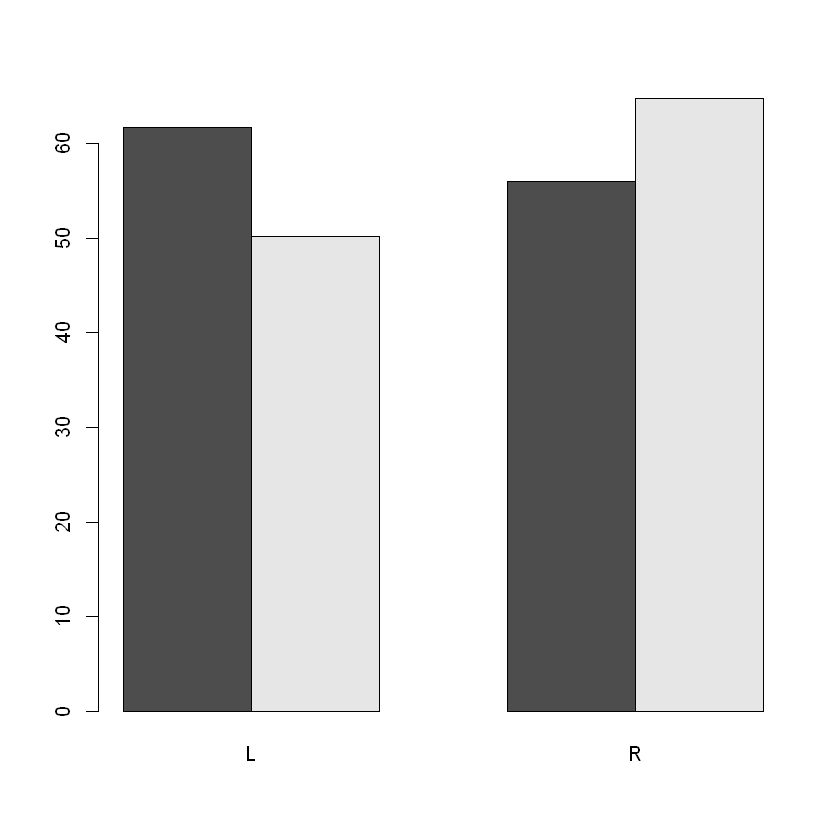

In [57]:
barplot(as.matrix(cast(frmn, Group~Sside, value = "Response", fun.aggregate=mean)), beside = T)

So despite almost identical learning experiences all consistent with a category boundary near 150, two groups (1) do not change their beliefs about the category boundary, (2) remain in significant disagreement as to the boundary location and (2) form different beliefs about the knowledge and accuracy (and marginally trust) of the two sources, preferring whichever provided labels most consistent with their initial belief.